# Bacbone model results for 4 nodes test system

In [9]:
# import some packages
import os
from glob import glob

import matplotlib.pyplot as plt
%matplotlib notebook
from numpy import linspace
from matplotlib import cm

from backbone import BackboneResults

Define results file and read file.

In [10]:
RESULTS = '../output-4nodes/results/backbone_FanSi-*.gdx'

latest = max(glob(RESULTS), key=os.path.getctime)

with BackboneResults(latest) as results:
    r_state = results['r_state'].unstack([0,1,2], fill_value=0)

## System overview
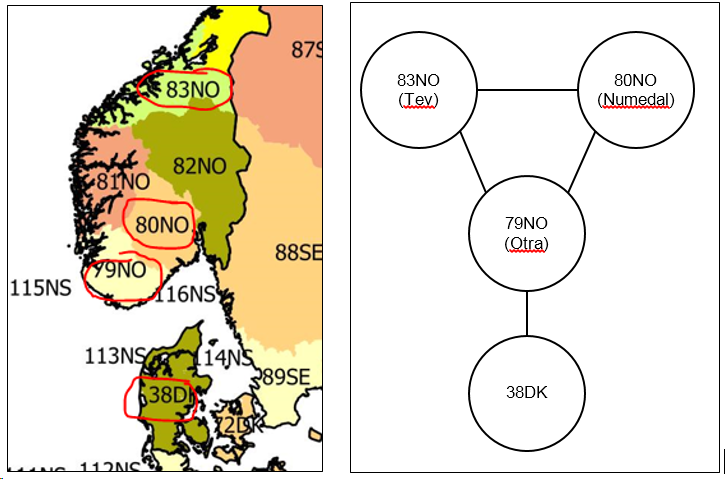

## Reservoir trajectories

First, get only state values in the 'hydro' grid and reservoir names.

In [15]:
r_state_hydro = r_state.xs('hydro', axis=1, level=1)
reservoirs = [res for res in r_state_hydro.columns.levels[1] if 'Reservoir' in res]
print(reservoirs)

['79NO_Reservoir', '80NO_Reservoir', '83NO_Reservoir']


### All reservoirs

Trajectories for all reservoirs with median and 10%/90% quantiles.

<IPython.core.display.Javascript object>


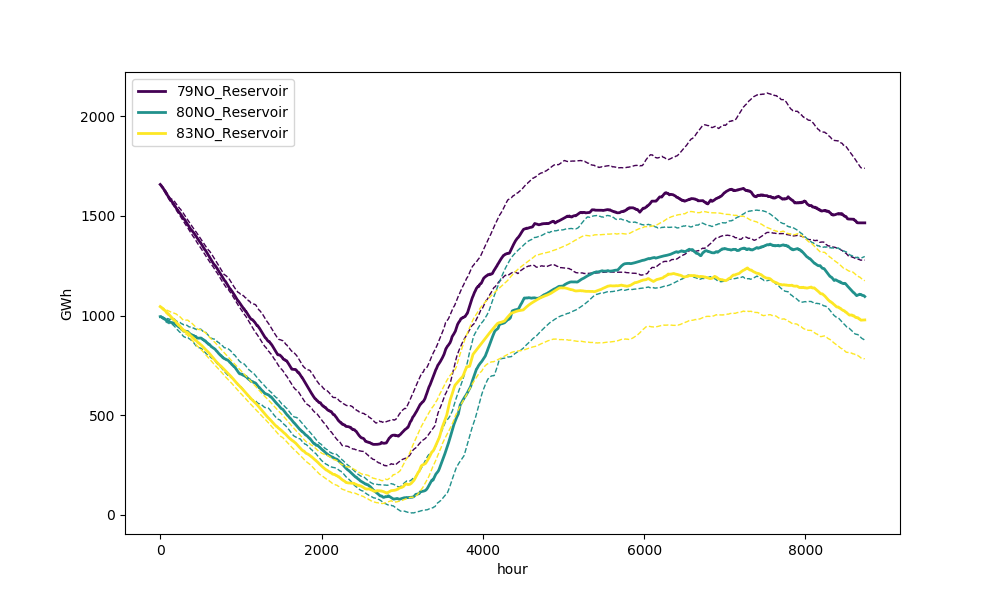

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

hydrores = r_state_hydro.loc[:, (slice(None), reservoirs)]
ax.set_xlabel('hour')
colors = cm.get_cmap('viridis')(linspace(0,1,len(reservoirs)))
for res, clr in zip(reservoirs, colors):
    ax.plot(hydrores.index, hydrores.xs(res, axis=1, level=1).median(1),
            lw=2, color=clr, label=res)
    ax.plot(hydrores.index, hydrores.xs(res, axis=1, level=1).quantile(0.1, axis=1),
            lw=1, ls='--', color=clr, label='_')
    ax.plot(hydrores.index, hydrores.xs(res, axis=1, level=1).quantile(0.9, axis=1),
            lw=1, ls='--', color=clr, label='_')
ax.legend()
ax.set_ylabel('GWh')
plt.show()

### Individual resrvoirs
Plot individual reservoir trajectories in all 

<IPython.core.display.Javascript object>


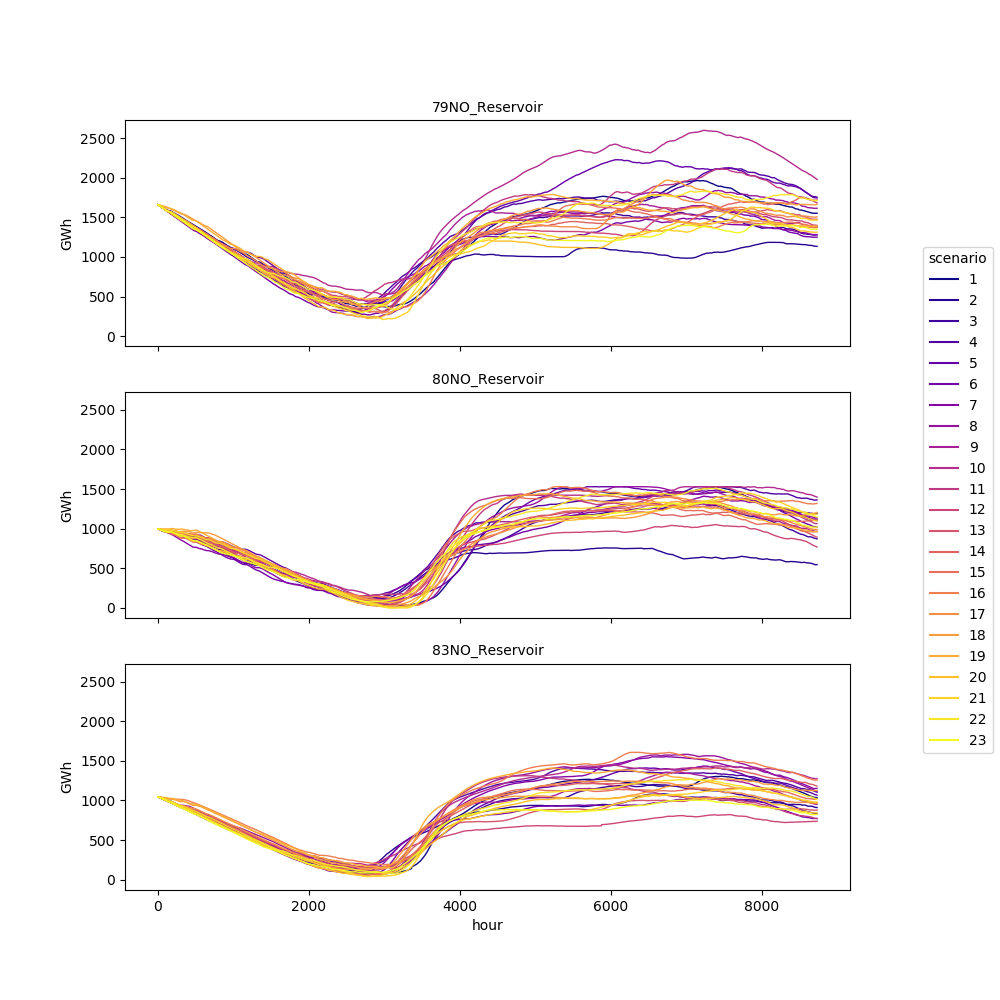

In [33]:
fig, axs = plt.subplots(nrows=len(reservoirs), sharex=True, sharey=True, figsize=(10,10))
n_scenarios = len(r_state_hydro.columns.levels[0])
colors = cm.get_cmap('plasma')(linspace(0,1,n_scenarios))
for res, ax in zip(reservoirs, axs):
    hydrores = r_state_hydro.xs(res, axis=1, level=1)
    hydrores.columns = [int(c.split('_')[1]) for c in hydrores.columns]
    hydrores = hydrores.sort_index(1)
    hydrores.plot(ax=ax, lw=1, color=colors)
    ax.set_xlabel('hour')
    ax.set_ylabel('GWh')
    ax.set_title(res)
    ax.get_legend().remove()
    
proxies = list()
for i in range(n_scenarios):
    proxies.append(axs[0].plot(0,0,color=colors[i])[0])
    
fig.subplots_adjust(right=0.85)
fig.legend(proxies, [i + 1 for i in range(n_scenarios)], 'right', title='scenario')
fig.show()
